# Import

[]
2.7.0


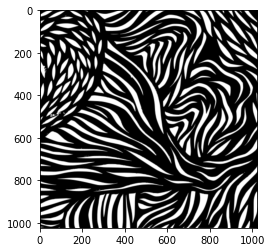

In [37]:
import os, time
import itertools, imageio, pickle

import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
from numpy import array

print(tf.config.list_physical_devices('GPU'))
print(tf.__version__)

import matplotlib.gridspec as gridspec
import scipy

# Path to your PNG file
file_path = 'G:/My Drive/CoursesColumbiaUniversity/DeepLearning/AIinART/Gabriele/Data_png/png_subset/222_0.png'

# Read the image
image_string = tf.io.read_file(file_path)

# Decode the image
image = tf.image.decode_png(image_string, channels=1)  # Adjust 'channels' if needed

nSize = 1024

# Resize the image to 512x512
image_resized = tf.image.resize(image, [nSize, nSize])

image_resized2 = image_resized.numpy().reshape(nSize, nSize)

#plt.imshow(image_resized2, cmap='Greys')
plt.imshow(image_resized2, cmap='gray')
plt.show()


In [34]:
def sig(x):
    return 1./(1. + np.exp(-x))

In [38]:
w11 = np.array([6.0, -5.0, 5.0])
w12 = np.array([0.5,-5, 5])
w21 = np.array([0.5,-5,5])
w22 = np.array([6.0, 5, 10])
b1 = np.array([-3, 1., 2.])
b2 = np.array([-3.0,-1, 1])
m1 = len(w11)
m2 = len(b1)

w11=6.0, w12=0.5, w21=0.5, w22=6.0, b1=-3.0, b2=-3.0


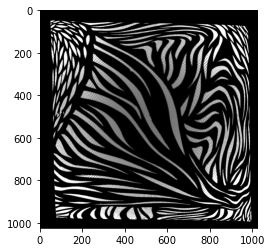

w11=6.0, w12=0.5, w21=0.5, w22=5.0, b1=-3.0, b2=-3.0


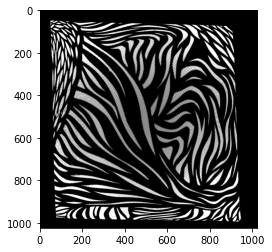

w11=6.0, w12=0.5, w21=0.5, w22=10.0, b1=-3.0, b2=-3.0


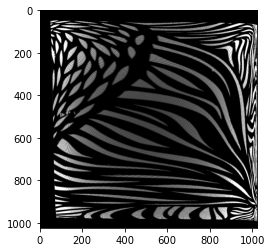

w11=6.0, w12=-5.0, w21=0.5, w22=6.0, b1=-3.0, b2=-3.0


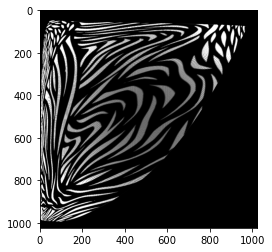

w11=6.0, w12=-5.0, w21=0.5, w22=5.0, b1=-3.0, b2=-3.0


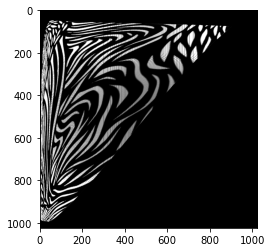

w11=6.0, w12=-5.0, w21=0.5, w22=10.0, b1=-3.0, b2=-3.0


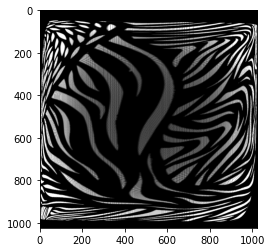

w11=6.0, w12=5.0, w21=0.5, w22=6.0, b1=-3.0, b2=-3.0


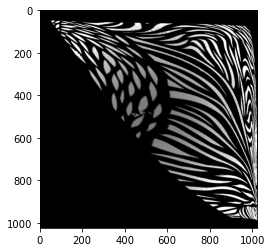

w11=6.0, w12=5.0, w21=0.5, w22=5.0, b1=-3.0, b2=-3.0


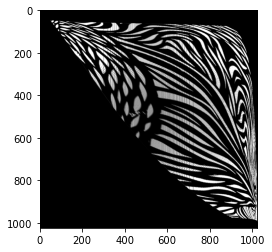

w11=6.0, w12=5.0, w21=0.5, w22=10.0, b1=-3.0, b2=-3.0


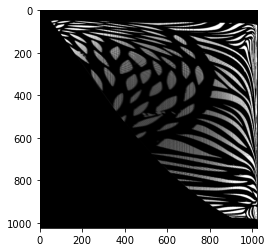

w11=6.0, w12=0.5, w21=-5.0, w22=6.0, b1=-3.0, b2=-3.0


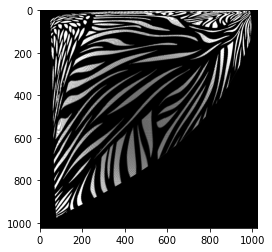

w11=6.0, w12=0.5, w21=-5.0, w22=5.0, b1=-3.0, b2=-3.0


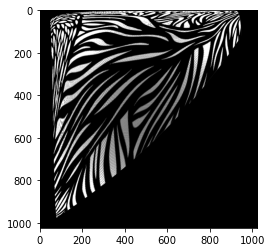

w11=6.0, w12=0.5, w21=-5.0, w22=10.0, b1=-3.0, b2=-3.0


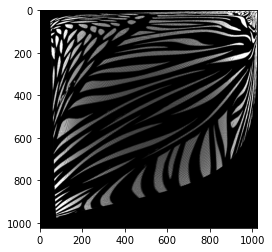

w11=6.0, w12=-5.0, w21=-5.0, w22=6.0, b1=-3.0, b2=-3.0


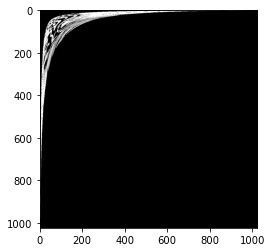

w11=6.0, w12=-5.0, w21=-5.0, w22=5.0, b1=-3.0, b2=-3.0


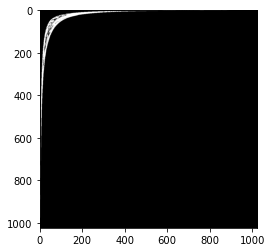

w11=6.0, w12=-5.0, w21=-5.0, w22=10.0, b1=-3.0, b2=-3.0


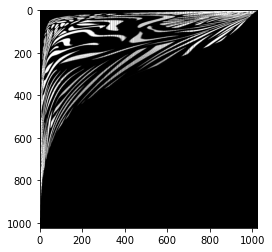

w11=6.0, w12=5.0, w21=-5.0, w22=6.0, b1=-3.0, b2=-3.0


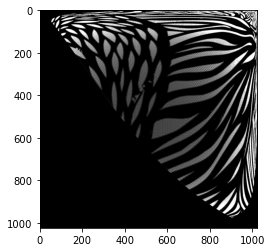

w11=6.0, w12=5.0, w21=-5.0, w22=5.0, b1=-3.0, b2=-3.0


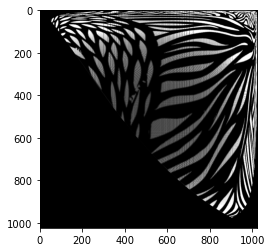

w11=6.0, w12=5.0, w21=-5.0, w22=10.0, b1=-3.0, b2=-3.0


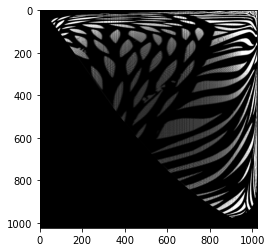

w11=6.0, w12=0.5, w21=5.0, w22=6.0, b1=-3.0, b2=-3.0


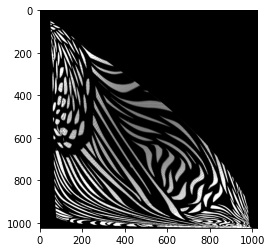

w11=6.0, w12=0.5, w21=5.0, w22=5.0, b1=-3.0, b2=-3.0


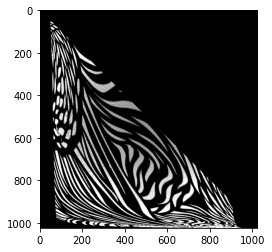

w11=6.0, w12=0.5, w21=5.0, w22=10.0, b1=-3.0, b2=-3.0


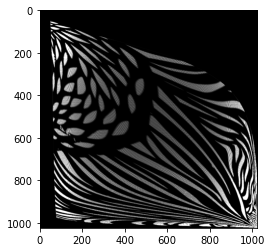

w11=6.0, w12=-5.0, w21=5.0, w22=6.0, b1=-3.0, b2=-3.0


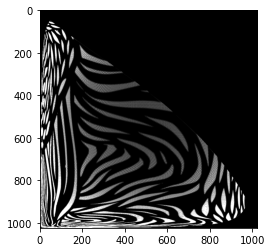

w11=6.0, w12=-5.0, w21=5.0, w22=5.0, b1=-3.0, b2=-3.0


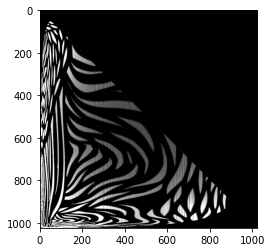

w11=6.0, w12=-5.0, w21=5.0, w22=10.0, b1=-3.0, b2=-3.0


KeyboardInterrupt: 

In [39]:
import copy
for i1 in np.arange(m2): 
    for i2 in np.arange(m2): 
        for j1 in np.arange(m1):
            for j2 in np.arange(m1):
                for j3 in np.arange(m1):
                    for j4 in np.arange(m1):
                        print(f"w11={w11[j1]}, w12={w12[j3]}, w21={w21[j2]}, w22={w22[j4]}, b1={b1[i1]}, b2={b2[i2]}")
                        image_resized3 = copy.deepcopy(image_resized2)
                        image_resized3 *= 0.0
                        img_size = image_resized3.shape[0]
                        
                        for x in range(image_resized3.shape[0]):
                            for y in range(img_size):
                                
                                x_hat = int(sig(w11[j1]*x/img_size + w21[j2]*y/img_size + b1[i1])*img_size)
                                y_hat = int(sig(w12[j3]*x/img_size + w22[j4]*y/img_size + b2[i2])*img_size)
                                image_resized3[x_hat][y_hat] += image_resized2[x][y]
                        
                        image_resized3 = np.minimum(image_resized3, 255.0)
                        plt.imshow(image_resized3, cmap='gray') #
                        plt.show()
                            